# <font color=darkred><center>CLAREYAMAR <br>
### <font color=gold><center>Clara Lelis, Yasmin Shimizu, Gabriel Martins<br>
 <font color=darkred><center>*Inluminans Ignotus*☀️🌊
 
<font color=black><center>Divisão responsável pela segurança das águas territoriais e regiões portuárias do reino de Lumi, iluminando a escuridão dos mares e as profundezas do oceano.
    
### <font color=blue><center> Quests 2
<font color=black><center> Em sua saga para conhecer melhor o Reino de Lumi, a divisão Clareyamar decide desbravar Praça da Fonte para analisar as águas consumidas pela população. Chegando ao seu destino, encontram um novo mural de quests e resolvem embarcar mais uma vez numa aventura em busca de ajudar os cidadãos nescessitados.
    
##### <font color=darkred><center> Missão 4: Uma terça-feira qualquer
<div class="alert alert-warning">
<center> "Se informe sobre outros modelos lineares que existem. Escolha um desses modelos e faça um notebook didático mostrando como este modelo funciona e como ele se difere do modelo linear estudado em sala de aula. Em um conjunto de
dados da sua escolha, treine um modelo linear múltiplo e compare o resultado com o modelo linear que você escolheu. Sua comparação deve levar em conta alguma métrica (como RMSE, por exemplo). Espera-se que resultados relevantes sejam
apresentados na forma de gráficos.
    
<center>O scikit-learn tem vários modelos lineares prontos, você pode conferir eles em https://scikit-learn.org/stable/modules/linear_model.html."
</div>

<font color=darkred><center> Introdução da missão 4 - Modelos 3<br>
<font color=black>Após sua primeira missão ser reconhecida pela diretora da Biblioteca Real Dra. Diana Didatolov, a divisão Clareyamar - responsável pela segurança das águas e regiões portuárias de Lumi - decidiu reanalisar os dados obtidos, mudando o modelo de ajuste destes. Para isso, utilizaram as informações sobre gêiseres e pinguins já estudadas para comparar dois modelos de previsão de dados: mínimos quadrados e Lasso. Desse modo, puderam achar um modelo linear que descrevesse melhor tais importantes componentes hídricos de Lumi.

# <font color=darkred>Você fita, eu Lasso

Modelos lineares de previsão consistem em métodos de regressão nos quais há uma combinação linear dos atributos para ajustar os dados. Em geral, modelos lineares são expressos por:

$$ \hat{y} = \beta_0 + \sum_{i=1}^{p}\beta_ix_i$$

em que $\hat{y}$ é previsão do modelo, $x_i$ são os atributos analisados, $\beta_i$ são os coeficientes que acompanham $x_i$ da combinação linear, e $\beta_0$ é o *intercepto* - ou seja, o valor inicial do modelo. Note que $p$ representa o número de atributos.


A previsão de modelos lineares mais tradicional é o **método de mínimos quadrados**, que define os coeficientes $\beta_i$ buscando minimizar a soma dos resíduos quadrados. Tal método é dado pela expressão:
$$
{\mathrm{min}} \sum_{j=1}^{n}\big(y_j-(\underset{\hat{y}_{j}}{\underbrace{\beta_0 + \sum_{i=1}^{p}\beta_ix_{ji}}})\big)^2
$$
em que $y_j$ representa cada *target* e $\hat{y}_{j}$ representa a previsão dada com base nos atributos $x_{ji}$. Note que $n$ é o número de dados obtidos e $p$ é o número de atributos.

Podemos, ainda, aplicar uma penalização nos termos $\beta_ix_{ji}$, a fim de minimizar ainda mais esse erro quadrado. Tal modelo com penalização é chamado de **Lasso**, que visa eliminar alguns termos do modelo linear zerando coeficientes $\beta_i$ para apresentar um modelo que se adeque melhor aos dados evitando o *overfiting* - ou seja, espera-se que o Lasso apresente um desempenho melhor que o método de mínimos quadrados para previsão de dados. Essa eliminação de coeficientes é dada ao somar o produto entre um *índice de penalização* $\alpha$ e cada coeficiente $\beta$. Assim, a expressão do Lasso é dada por:

$$
{\mathrm{min}} \frac{1}{2n} \sum_{j=1}^{n}\big(y_j-(\underset{\hat{y}_{j}}{\underbrace{\beta_0 + \sum_{i=1}^{p}\beta_ix_{ji}}})\big)^2 + \alpha\sum_{i=1}^{p}\mid\beta_i\mid
$$

em que buscamos os valores dos coeficientes $\beta$ que minimizam a função, sendo $\alpha$ o chamado *índice de penalização*. Note que $n$ é o número de dados obtidos e $p$ é o número de atributos. A razão $\frac{1}{2n}$ que multiplica o primeiro termo na expressão trata-se de um normalizador relacionado ao número de dados, cuja finalidade é simplificar o cálculo da derivada utilizado para a minimização da função.

É importante observar que, se $\alpha=0$, o ajuste obtido pelo Lasso é o mesmo obtido pelo método de mínimos quadrados, visto que não há penalização sobre os coeficientes. Já se $\alpha \rightarrow \infty$, a penalização é infinita e todos os coeficientes são zerados, de modo que o modelo linear obtido seja inconclusivo e igual a zero. Desse modo, é preciso encontrar um valor $0<\alpha<\infty$ que torne o modelo mais eficiente, utilizando uma métrica como, por exemplo, o RMSE, para testar os modelos treinados. Para isso, é possível utilizar a estratégia de *validação cuzada* para dividir os dados analisados, testando diferentes valores de $\alpha$ em cada *fold* e analisando o melhor desempenho dos modelos treinados através de uma métrica.
    
Tanto a regressão linear por mínimos quadrados, quanto o Lasso e o LassoCV (Lasso com validação cruzada embutida para teste de $\alpha$'s) podem ser importados do módulo `scikit learn`, como explporado nas próximas sessões deste notebook.

In [1]:
import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## <font color=darkred>Metodologia
Aqui, escolhemos trabalhar diferentes métodos de regressão linear de duas formas: primeiramente, com *fit* através de um único atributo e um *target* a ser previsto; depois, para três atributos e um *target* a ser previsto.
    
Começamos com o dataset `geyser` do módulo `Seaborn`, que contém 272 observações sobre o gêiser Old Faithful, nos EUA, relacionadas ao tempo de duração e de espera de cada erupção, além de uma classificação categórica do tipo de cada erupção. Para isso, utilizamos o trabalho feito nas nossas últimas missões da divisão, aproveitando os dados disponibilizados na Biblioteca Real. Com base nisso, foi aplicado o `train_test_split` para treinar um modelo de ajuste de dados com os três métodos de regressão linear apresentados, comparando ao calcular o RMSE de cada modelo.
    
Posteriormente, com o dataset `penguins` do mesmo módulo `Seaborn`, previmos a massa corporal de pinguins da espécie Adelie através dos atributos de comprimento do bico, profundidade do bico, e comprimento da barbatana de 146 observações. Com base nisso, novamente, foi aplicado o `train_test_split` para treinar um modelo de ajuste de dados com os três métodos de regressão linear apresentados, comparando ao calcular o RMSE de cada modelo.

### <font color=darkred>Métrica para comparação

A fim de analisar o desempenho dos modelos observados, primeiramente, importamos a função `mean_squared_error` do módulo `scikit learn` e criamos uma função `calcula_RMSE` para utilizar como métrica e melhor vizualizar o comportamento das previsões calculadas.

In [2]:
from sklearn.metrics import mean_squared_error

def calcula_RMSE(y_verdadeiro, y_previsto):

    RMSE = mean_squared_error(y_verdadeiro, y_previsto, squared=False)

    return RMSE

### <font color=darkred> Fitagem com um atributo - Geyser
Primeiramente, importamos o *dataset* a ser analisado e realizamos a separação desses dados em treino e teste, utilizando uma semente aleatória para guardar tal separação de dados.

In [3]:
df= sb.load_dataset("geyser")
df

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long
...,...,...,...
267,4.117,81,long
268,2.150,46,short
269,4.417,90,long
270,1.817,46,short


In [4]:
from sklearn.model_selection import train_test_split

TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 2309024

indices = df.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]

In [5]:
df_treino

,duration,waiting,kind
15,2.167,52,short
137,4.933,86,long
82,4.100,70,long
87,4.517,80,long
223,4.483,75,long
...,...,...,...
70,4.033,82,long
245,3.833,82,long
74,1.983,62,short
192,4.800,76,long


In [6]:
df_teste

,duration,waiting,kind
260,4.767,78,long
156,4.500,81,long
2,3.333,74,long
242,4.933,86,long
86,3.950,76,long
252,3.567,73,long
213,3.833,75,long
46,3.833,64,short
123,1.967,56,short
136,1.883,51,short


#### <font color=darkred>Plotagem dos dados e aplicação do método de mínimos quadrados
    
Tendo os dados divididos, podemos partir para o treinamento dos modelos de previsão. Inicialmente, faremos a previsão através de mínimos quadrados com apenas um atributo, cuja função pode ser definida manualmente como feito abaixo:

In [7]:
def regressao_linear_simples(x, y):
    media_x = np.mean(x)
    media_y = np.mean(y)

    beta_1 = sum((x - media_x) * (y - media_y)) / sum((x - media_x) ** 2)
    beta_0 = media_y - beta_1 * media_x

    return beta_0, beta_1

Com a função `regressao_linear_simples` criada, podemos aplicá-la aos dados de treino, e, através dos coeficientes obtidos, tentar prever os dados de teste. Feito isso, plotamos os dados num gráfico de curvas e pontos, com os dados de teste destacados e a representação da fitagem realizada pelo modelo. Ainda, calculamos o RMSE do modelo treinado como métrica.

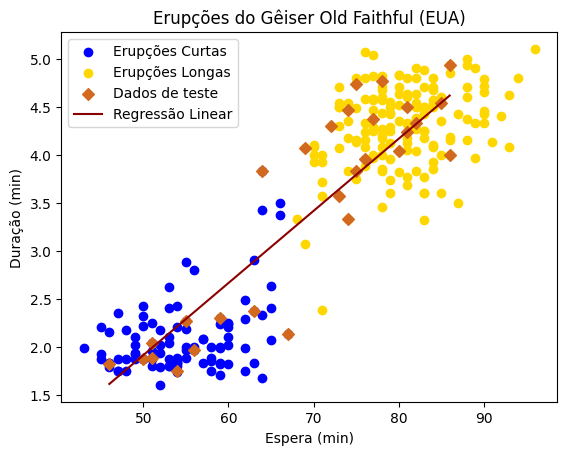

In [8]:
#divisão dos dados de acordo com as categorias
n= len(df)

kind = list(df["kind"])
dur = list(df["duration"])
wait = list(df["waiting"])

short = []
short_wait = []
long = []
long_wait=[]

for i in range (n):
    if kind[i]== "short":
        short.append(dur[i])
        short_wait.append(wait[i])
    elif kind[i]== "long":
        long.append(dur[i])
        long_wait.append(wait[i])

#plotagem dos dados
plt.scatter(short_wait, short, marker = "o", color="blue", label = "Erupções Curtas")
plt.scatter(long_wait, long, marker = "o", color="gold", label = "Erupções Longas")
plt.scatter(df_teste["waiting"],df_teste["duration"], marker = "D", color = "chocolate", label = "Dados de teste")
plt.xlabel("Espera (min)")
plt.ylabel("Duração (min)")

#ajuste de curva
b0_g, b1_g = regressao_linear_simples(df_treino["waiting"], df_treino["duration"])    
xfit_g = np.array(sorted(df_teste["waiting"]))
yfit_g = b0_g + b1_g*xfit_g
plt.plot(xfit_g, yfit_g, color = "darkred", label = "Regressão Linear")

plt.title("Erupções do Gêiser Old Faithful (EUA)")
plt.legend()
plt.show()

In [9]:
RMSE = calcula_RMSE(df_teste["duration"],yfit_g)

print(f"O RMSE do modelo foi de {RMSE} min.")

O RMSE do modelo foi de 1.5941809679638188 min.


É possível, ainda, plotar um gráfico que relaciona os *targets* que o *dataset* apresenta à previsão realizada pelo modelo - sendo que a curva esperada de um modelo ideal seja próximo a reta $x=y$ -, a fim de comparar a dispersão dos erros do modelo treinado:

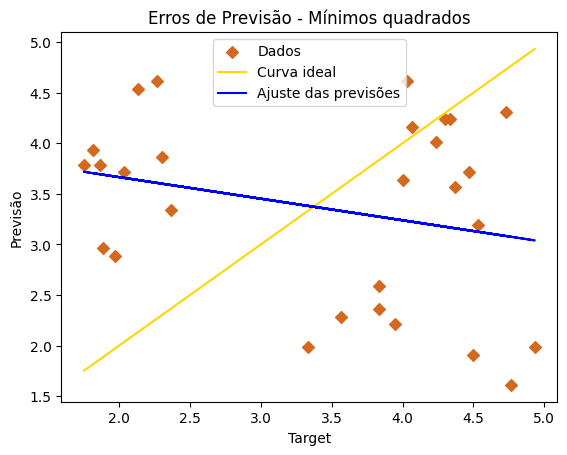

In [10]:
#plotagem dos dados de teste
plt.scatter (df_teste["duration"], yfit_g, marker = "D", color = "chocolate", label = "Dados")

#plotagem da curva ideal
plt.plot([min(df_teste["duration"]),max(df_teste["duration"])],[min(df_teste["duration"]),max(df_teste["duration"])], color = "gold", label = "Curva ideal")

#ajuste dos dados de teste
b0, b1 = regressao_linear_simples(df_teste["duration"],yfit_g)  
xfit = np.array(df_teste["duration"])
yfit = b0 + b1*xfit
plt.plot(xfit, yfit, color = "blue", label = "Ajuste das previsões")

plt.title("Erros de Previsão - Mínimos quadrados")
plt.legend()
plt.xlabel("Target")
plt.ylabel("Previsão")
plt.show()

Pelo comportamento do gráfico apresentado, percebe-se que a precisão do modelo não foi boa, considerando a dispersão dos pontos no gráfico. Isso indica que o erro das previsões foi elevado, com a curva que analisa o comportamento desses erros em uma orientação muito diferente daquela esperada. 

#### <font color=darkred>Aplicando o modelo Lasso
    
A implementação do modelo *Lasso* é feita através do módulo `scikit learn`, utilizando o prcedimento padrão para implementar modelos de previsão: importar, chamar, fitar, e prever - utilizando o valor $\alpha=1$ padronizado no modelo. Assim, com os resultados obtidos, plotamos um gráfico que representa os dados e seu ajuste, como feito para o modelo anterior.

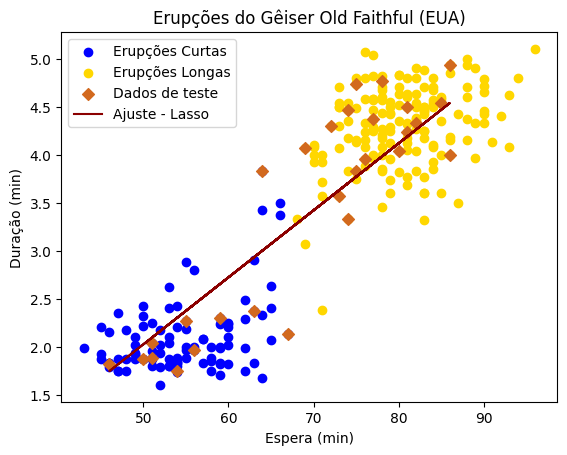

In [11]:
from sklearn.linear_model import Lasso

#plotagem dos dados
plt.scatter(short_wait, short, marker = "o", color="blue", label = "Erupções Curtas")
plt.scatter(long_wait, long, marker = "o", color="gold", label = "Erupções Longas")
plt.scatter(df_teste["waiting"],df_teste["duration"], marker = "D", color = "chocolate", label = "Dados de teste")
plt.xlabel("Espera (min)")
plt.ylabel("Duração (min)")


# ajuste de curva
modelo = Lasso(alpha=1) #definindo o modelo

modelo.fit(df_treino[["waiting"]], df_treino["duration"]) #treinando o modelo

previsoes = modelo.predict(df_teste[["waiting"]]) #previsões do modelo

# plotagem do ajuste
plt.plot(df_teste["waiting"], previsoes, color = "darkred", label = "Ajuste - Lasso")
plt.title("Erupções do Gêiser Old Faithful (EUA)")
plt.legend()
plt.show()

In [12]:
RMSE = calcula_RMSE(df_teste["duration"], previsoes)

print(f"O RMSE do modelo foi de {RMSE} min.")

O RMSE do modelo foi de 0.5018984090459501 min.


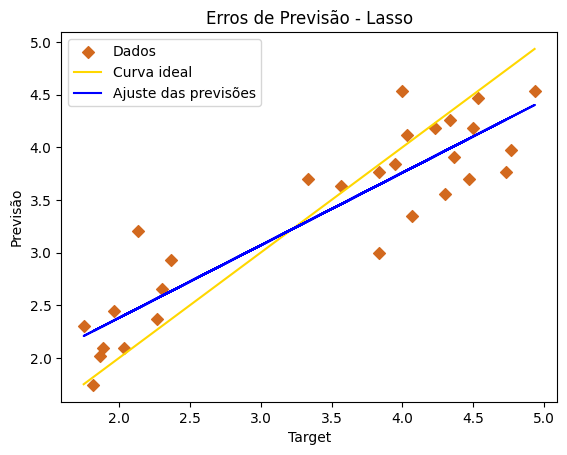

In [13]:
#plotagem de dados de teste
plt.scatter (df_teste["duration"], previsoes, marker = "D", color = "chocolate", label = "Dados")

#plotagem da curva ideal
plt.plot([min(df_teste["duration"]),max(df_teste["duration"])],[min(df_teste["duration"]),max(df_teste["duration"])], color = "gold", label = "Curva ideal")

#ajuste dos dados de teste
b0, b1 = regressao_linear_simples(df_teste["duration"],previsoes)  
xfit = np.array(df_teste["duration"])
yfit = b0 + b1*xfit
plt.plot(xfit, yfit, color = "blue", label = "Ajuste das previsões")

plt.title("Erros de Previsão - Lasso")
plt.legend()
plt.xlabel("Target")
plt.ylabel("Previsão")
plt.show()

Calculando o RMSE e plotando graficamente a relação entre os *targets* e as previsões feitas para os dados de teste, foi possível perceber a discrepância entre a eficiência dos modelos: o RMSE obtido com o modelo Lasso foi mais de três vezes menor que o obtido pelo método de mínimos quadrados, notável pelo gráfico de erros de previsão - no qual a dispersão dos dados e ajuste das previsões se aproxima muito mais da curva ideal. 

Dese modo, o Lasso se mostra um modelo mais eficiente, como proposto e esperado!

##### <font color=darkred>Buscando diferentes $\alpha$ por validação cruzada
    
Buscando melhorar ainda mais nosso modelo, implementamos o `LassoCV` do `scikit learn`, que usa a divisão de dados por validação cruzada para testar diferentes valores de alpha. Com isso, recuperamos os valores $\alpha$ testados e plotamos um gráfico de barras que compara o desempenho de cada um com RMSE, e aplicamos o modelo Lasso para o melhor valor $\alpha$ obtido para realizar uma comparação com os modelos anteriores.

In [14]:
from sklearn.linear_model import LassoCV

#implementação do modelo
modelo_cv = LassoCV(cv=10)

#fitando o modelo
modelo_cv.fit(df_teste[["waiting"]], df_teste["duration"])

#aplicando o modelo
LassoCV(cv=10)

#guandando os alpha calculados
alphas_test = modelo_cv.alphas_
melhor_alpha = modelo_cv.alpha_

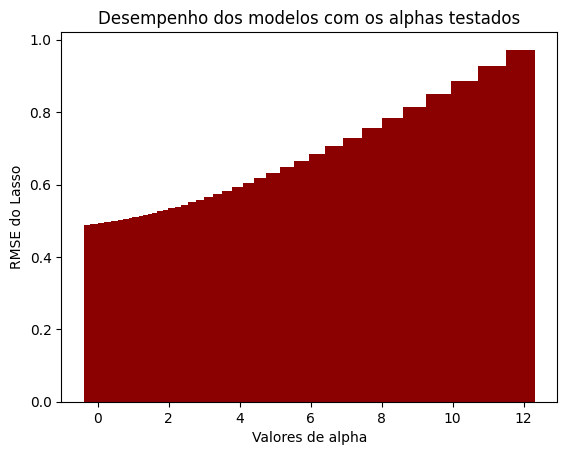

In [15]:
#plotagem do gráfico de barras comparativo (alphas x RMSE)
RMSE_folds = []

for i in alphas_test:
    modelo_folds = Lasso(alpha=i)

    modelo_folds.fit(df_treino[["waiting"]], df_treino["duration"])
    
    previsao = modelo_folds.predict(df_teste[["waiting"]])
    
    RMSE = calcula_RMSE(df_teste["duration"], previsao)
    
    RMSE_folds.append(RMSE)

plt.bar(alphas_test,RMSE_folds, color = "darkred")
plt.title("Desempenho dos modelos com os alphas testados")
plt.xlabel("Valores de alpha")
plt.ylabel("RMSE do Lasso")
plt.show()

Nesse caso, podemos perceber que os menores RMSE são obtidos com $\alpha$'s menores. Podemos, então, aplicar o melhor valor de $\alpha$ obtido pelo `LassoCV` no Lasso para realizar o ajuste de dados.

O melhor valor de alpha encontrado foi: 0.02231917316779166


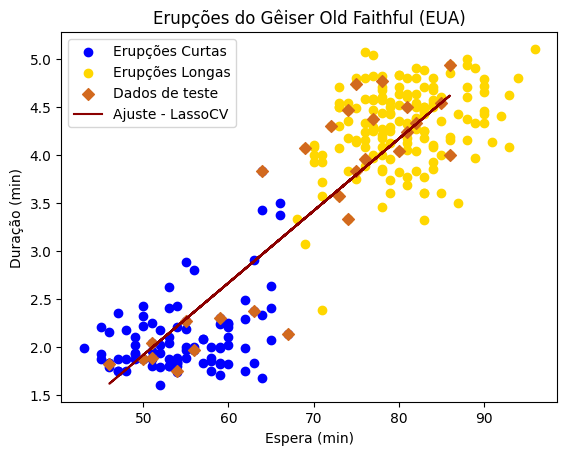

In [16]:
print(f"O melhor valor de alpha encontrado foi: {melhor_alpha}")

#plotagem dos dados
plt.scatter(short_wait, short, marker = "o", color="blue", label = "Erupções Curtas")
plt.scatter(long_wait, long, marker = "o", color="gold", label = "Erupções Longas")
plt.scatter(df_teste["waiting"],df_teste["duration"], marker = "D", color = "chocolate", label = "Dados de teste")
plt.xlabel("Espera (min)")
plt.ylabel("Duração (min)")


# aplicação do lasso com o melhor alpha encontrado
modelo = Lasso(alpha=melhor_alpha)

modelo.fit(df_treino[["waiting"]], df_treino["duration"])

previsoes_cv = modelo.predict(df_teste[["waiting"]]) #previsões feitas pelo modelo

plt.plot(df_teste["waiting"], previsoes_cv, color = "darkred", label = "Ajuste - LassoCV")
plt.title("Erupções do Gêiser Old Faithful (EUA)")
plt.legend()
plt.show()

In [17]:
RMSE = calcula_RMSE(df_teste["duration"], previsoes_cv)

print(f"O RMSE do modelo foi de {RMSE} min.")

O RMSE do modelo foi de 0.4879486773933387 min.


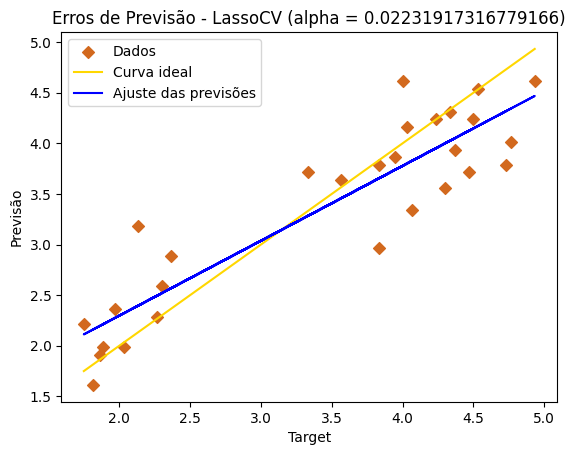

In [18]:
#plotagem dos dados de teste
plt.scatter (df_teste["duration"], previsoes_cv, marker = "D", color = "chocolate", label = "Dados")

#plotagem da curva ideal
plt.plot([min(df_teste["duration"]),max(df_teste["duration"])],[min(df_teste["duration"]),max(df_teste["duration"])], color = "gold", label = "Curva ideal")

#ajuste dos dados de teste
b0, b1 = regressao_linear_simples(df_teste["duration"],previsoes_cv)  
xfit = np.array(df_teste["duration"])
yfit = b0 + b1*xfit
plt.plot(xfit, yfit, color = "blue", label = "Ajuste das previsões")

plt.title(f"Erros de Previsão - LassoCV (alpha = {melhor_alpha})")
plt.legend()
plt.xlabel("Target")
plt.ylabel("Previsão")
plt.show()

Calculando o RMSE para o Lasso utilizando o melhor valor de $\alpha$, foi possível perceber uma pequena diferença no seu desempenho em comparação com o $\alpha = 1$ padrão. Utilizando a validação cruzada para emcontrar o melhor $\alpha$ , obtivemos um menor RMSE, perceptível no gráfico de erros de previsão relacionando os *targets* com os resultados alcançados pelo modelo - no qual os pontos e o ajuste de previsões estão menos dispersos e mais próximos da curva ideal.

Assim, o Lasso mostra que tende a ser, de fato, a melhor estratégia de previsão de dados - desde que se escolha o melhor índice de penalização $\alpha$ para minimizar o RMSE do modelo treinado.

### <font color=darkred>Fitagem com múltiplos atributos - Penguins
Visando analisar o desempenho do modelo Lasso com validação cruzada para múltiplas entradas, faremos uma previsão da massa corporal de penguins Adelie, através do dataset `Penguins` do `Seaborn`. Primeiramente, importamos o *dataset* a ser analisado e realizamos a separação desses dados em treino e teste, utilizando uma semente aleatória para guardar tal separação de dados.

In [19]:
df_p = sb.load_dataset("penguins")
df_p = df_p.dropna()

df_p

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [20]:
#separando os penguins da espécie Adelie
bico_comp = list(df_p["bill_length_mm"])
bico_prof = list(df_p["bill_depth_mm"])
barbatana = list(df_p["flipper_length_mm"])
massa = list(df_p["body_mass_g"])
sexo = list(df_p["sex"])

spc = list(df_p["species"])

abcomp = []
abprof = []
abarb = []
amass = []
asex = []


for i in range(n):
    if spc[i]== "Adelie":
        abcomp.append(bico_comp[i])
        abprof.append(bico_prof[i])
        abarb.append(barbatana[i])
        amass.append(massa[i])
        asex.append(sexo[i])
        
adelie_dict = {"Comprimento do bico": abcomp,
              "Profundidade do bico": abprof,
              "Comprimento da barbatana": abarb,
              "Massa corporal": amass,
              "Sexo": asex}

df_adict = pd.DataFrame.from_dict(adelie_dict)
df_adict

,Comprimento do bico,Profundidade do bico,Comprimento da barbatana,Massa corporal,Sexo
0,39.1,18.7,181.0,3750.0,Male
1,39.5,17.4,186.0,3800.0,Female
2,40.3,18.0,195.0,3250.0,Female
3,36.7,19.3,193.0,3450.0,Female
4,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...
141,36.6,18.4,184.0,3475.0,Female
142,36.0,17.8,195.0,3450.0,Female
143,37.8,18.1,193.0,3750.0,Male
144,36.0,17.1,187.0,3700.0,Female


In [21]:
#split treino-teste
TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 2309024

indices = df_adict.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

dfa_treino = df_adict.loc[indices_treino]
dfa_teste = df_adict.loc[indices_teste]

In [22]:
dfa_treino

,Comprimento do bico,Profundidade do bico,Comprimento da barbatana,Massa corporal,Sexo
143,37.8,18.1,193.0,3750.0,Male
116,40.2,17.0,176.0,3450.0,Female
27,39.5,17.8,188.0,3300.0,Female
69,42.8,18.5,195.0,4250.0,Male
130,35.6,17.5,191.0,3175.0,Female
...,...,...,...,...,...
128,38.1,17.6,187.0,3425.0,Female
91,40.3,18.5,196.0,4350.0,Male
70,40.9,16.8,191.0,3700.0,Female
63,41.8,19.4,198.0,4450.0,Male


In [23]:
dfa_teste

,Comprimento do bico,Profundidade do bico,Comprimento da barbatana,Massa corporal,Sexo
18,38.2,18.1,185.0,3950.0,Male
106,39.7,17.7,193.0,3200.0,Female
125,43.1,19.2,197.0,3500.0,Male
104,38.1,16.5,198.0,3825.0,Female
68,35.5,17.5,190.0,3700.0,Female
80,36.3,19.5,190.0,3800.0,Male
133,39.7,17.9,193.0,4250.0,Male
132,37.0,16.5,185.0,3400.0,Female
98,37.9,18.6,193.0,2925.0,Female
102,38.1,17.0,181.0,3175.0,Female


#### <font color=darkred>Plotagem dos dados e aplicação do método de mínimos quadrados
    
Diferente do feito para previsão com apenas um atributo, aqui, utilizaremos o `LinearRegression` do `scikit learn` para prever os dados pelo método de mínimos quadrados. Para isso, importamos, chamamos, fitamos e prevemos os dados de teste, analisando o desempenho do modelo treinado ao calcular o RMSE. Como, não é possível plotar um gráfico 4D para englobar os 3 atributos e o target obtido, foi feito apenas a relação entre *target* e previsões.

In [24]:
#implementação do LinearRegression

from sklearn.linear_model import LinearRegression

modelo_ra = LinearRegression()

modelo_ra.fit(dfa_treino[["Comprimento do bico","Profundidade do bico","Comprimento da barbatana"]],dfa_treino["Massa corporal"])

previsoes_ra = modelo_ra.predict(dfa_teste[["Comprimento do bico","Profundidade do bico","Comprimento da barbatana"]])

RMSE = calcula_RMSE(dfa_teste["Massa corporal"], previsoes_ra)

print(f"O RMSE do modelo foi de {RMSE} g.")

O RMSE do modelo foi de 396.29825878139616 g.


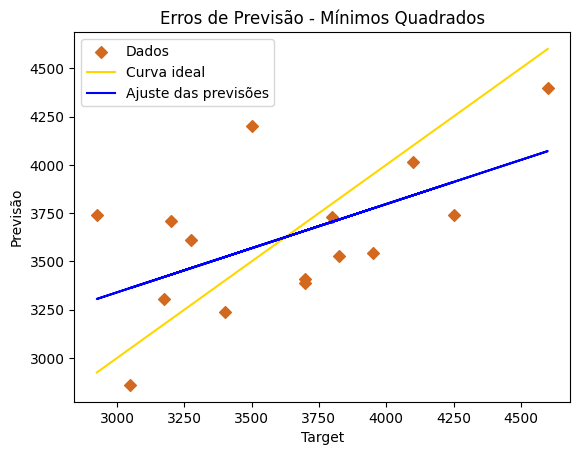

In [25]:
#Grafico Target x Previsões

#plotando dados de teste
plt.scatter (dfa_teste["Massa corporal"], previsoes_ra, marker = "D", color = "chocolate", label = "Dados")

#plotando curva ideal
plt.plot([min(dfa_teste["Massa corporal"]),max(dfa_teste["Massa corporal"])],[min(dfa_teste["Massa corporal"]),max(dfa_teste["Massa corporal"])], color = "gold", label = "Curva ideal")

#ajustando dados de teste
b0_ra, b1_ra = regressao_linear_simples(dfa_teste["Massa corporal"],previsoes_ra)  
xfit_ra = np.array(dfa_teste["Massa corporal"])
yfit_ra = b0_ra + b1_ra*xfit_ra
plt.plot(xfit_ra, yfit_ra, color = "blue", label = "Ajuste das previsões")

plt.title("Erros de Previsão - Mínimos Quadrados")
plt.legend()
plt.xlabel("Target")
plt.ylabel("Previsão")
plt.show()

Aqui, percebemos que o RMSE se mostra elevado. Entretando, considerando a magnitude dos dados, este valor se mostra condizente, principalmente observando o comportamento do gráfico que relaciona o erro das previsões - a curva de ajuste das previsões se mostra próxima à curva ideal, ainda que seu coeficiente angular seja menor. 

#### <font color=darkred>Aplicando o modelo Lasso
    
Implementamos o `Lasso` da mesma maneira feita para o dataset anterior, entretanto, sem plotagem dos dados e do ajuste - apenas da relação entre *target* e previsão.

In [26]:
#implementação do Lasso
modelo_a = Lasso(alpha=1)

#fitagem do Lasso
modelo_a.fit(dfa_treino[["Comprimento do bico","Profundidade do bico","Comprimento da barbatana"]],dfa_treino["Massa corporal"])

#previsões do lasso
previsoes_a = modelo_a.predict(dfa_teste[["Comprimento do bico","Profundidade do bico","Comprimento da barbatana"]])

#calculo do RMSE
RMSE = calcula_RMSE(dfa_teste["Massa corporal"], previsoes_a)

print(f"O RMSE do modelo foi de {RMSE} g.")

O RMSE do modelo foi de 396.092279730278 g.


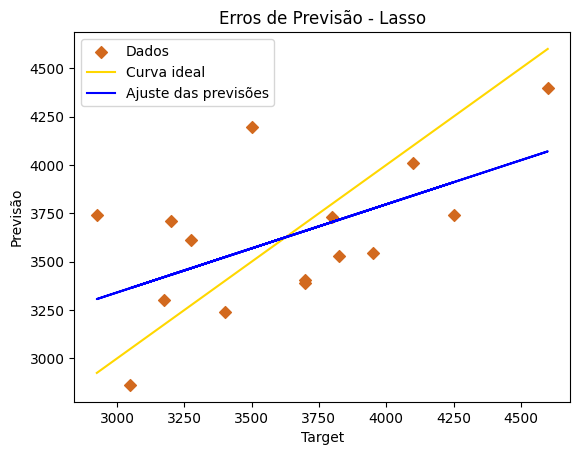

In [27]:
#plotagem Target x Previsões

#dados
plt.scatter (dfa_teste["Massa corporal"], previsoes_a, marker = "D", color = "chocolate", label = "Dados")

#curva ideal
plt.plot([min(dfa_teste["Massa corporal"]),max(dfa_teste["Massa corporal"])],[min(dfa_teste["Massa corporal"]),max(dfa_teste["Massa corporal"])], color = "gold", label = "Curva ideal")

#ajuste
b0_a, b1_a = regressao_linear_simples(dfa_teste["Massa corporal"],previsoes_a)  
xfit_a = np.array(dfa_teste["Massa corporal"])
yfit_a = b0_a + b1_a*xfit_a
plt.plot(xfit_a, yfit_a, color = "blue", label = "Ajuste das previsões")

plt.title("Erros de Previsão - Lasso")
plt.legend()
plt.xlabel("Target")
plt.ylabel("Previsão")
plt.show()

Para o $\alpha=1$ padrão do `Lasso` do `Scikit learn`, houve uma melhora extremamente pequena no RMSE comparando com o modelo de mínimos quadrados - apenas 0,2 g a menos. Assim, mesmo graficamente, é quase imperceptível a mudança de dispersão dos erros de previsão. Então, caso queiramos melhor o desempenho da regressão linear, devemos procurar um índice de penalidade mais apropriado.

##### <font color=darkred>Buscando diferentes $\alpha$ por validação cruzada
    
Novamente, implementamos o `LassoCV` do `scikit learn`, para testar diferentes valores de alpha através de validação cruzada, plotando tanto o gráfico de barras que compara o desempenho dos modelos treinados com diferentes $\alpha$'s através do RMSE, e aplicamos o modelo Lasso para o melhor valor $\alpha$ obtido.

In [28]:
#implementação LassoCV
modelo_cva = LassoCV(cv=10)

#fitagem do lassoCV - validação cruzada embutida
modelo_cva.fit(dfa_treino[["Comprimento do bico","Profundidade do bico","Comprimento da barbatana"]],dfa_treino["Massa corporal"])
LassoCV(cv=10)

#salvando os valores de alpha obtidos
alphas_tests = modelo_cva.alphas_
melhor_alpha_a = modelo_cva.alpha_

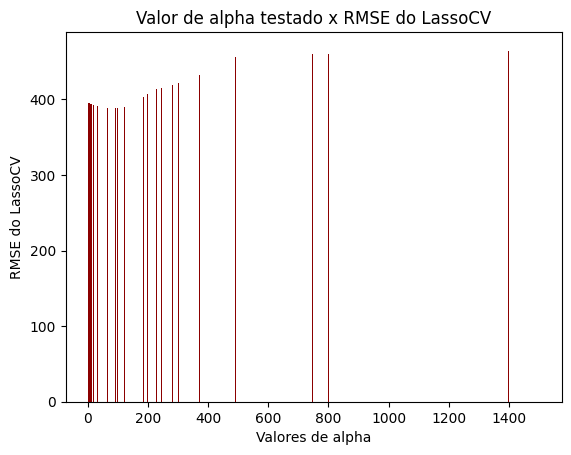

In [29]:
#plotagem do gráfico de barras comparativo (alpha x RMSE)
RMSE_alphas = []

for i in alphas_tests:
    modelo_cva = Lasso(alpha=i)

    modelo_cva.fit(dfa_treino[["Comprimento do bico","Profundidade do bico","Comprimento da barbatana"]],dfa_treino["Massa corporal"])

    previsoes_cva = modelo_cva.predict(dfa_teste[["Comprimento do bico","Profundidade do bico","Comprimento da barbatana"]])

    RMSE = calcula_RMSE(dfa_teste["Massa corporal"], previsoes_cva)
    
    RMSE_alphas.append(RMSE)

plt.bar(alphas_tests,RMSE_alphas, color = "darkred")
plt.title("Valor de alpha testado x RMSE do LassoCV")
plt.xlabel("Valores de alpha")
plt.ylabel("RMSE do LassoCV")
plt.show()

Nesse caso, podemos perceber que os menores RMSE são obtidos quando $\alpha$ está numa faixa em torno de 100, entretanto, a alta concentração de testes para valores pequenos impossibilita a identificação visual clara. Podemos, então, puxar eaplicar o melhor valor de $\alpha$ obtido pelo `LassoCV` no Lasso para realizar o ajuste de dados.

In [30]:
print(f"O melhor valor de alpha encontrado foi: {melhor_alpha_a}")

#aplicando o modelo lasso para o melhor alpha encontrado no lassoCV
modelo_cva = Lasso(alpha=melhor_alpha_a)

modelo_cva.fit(dfa_treino[["Comprimento do bico","Profundidade do bico","Comprimento da barbatana"]],dfa_treino["Massa corporal"])

previsoes_cva = modelo_cva.predict(dfa_teste[["Comprimento do bico","Profundidade do bico","Comprimento da barbatana"]])

#calculo RMSE
RMSE = calcula_RMSE(dfa_teste["Massa corporal"], previsoes_cva)

print(f"O RMSE do modelo foi de {RMSE} g.")

O melhor valor de alpha encontrado foi: 8.584926978017505
O RMSE do modelo foi de 394.61716846600257 g.


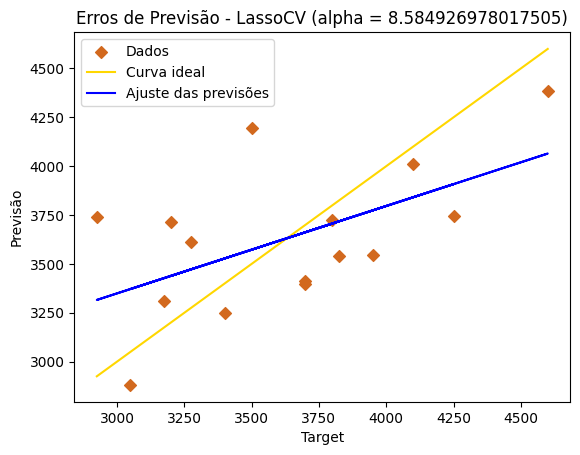

In [31]:
#plotagem target x previsão

#dados de teste
plt.scatter (dfa_teste["Massa corporal"], previsoes_cva, marker = "D", color = "chocolate", label = "Dados")

#curva ideal
plt.plot([min(dfa_teste["Massa corporal"]),max(dfa_teste["Massa corporal"])],[min(dfa_teste["Massa corporal"]),max(dfa_teste["Massa corporal"])], color = "gold", label = "Curva ideal")

#ajuste
b0_cva, b1_cva = regressao_linear_simples(dfa_teste["Massa corporal"],previsoes_cva)  
xfit_cva = np.array(dfa_teste["Massa corporal"])
yfit_cva = b0_cva + b1_cva*xfit_cva
plt.plot(xfit_cva, yfit_cva, color = "blue", label = "Ajuste das previsões")

plt.title(f"Erros de Previsão - LassoCV (alpha = {melhor_alpha_a})")
plt.legend()
plt.xlabel("Target")
plt.ylabel("Previsão")
plt.show()

Calculando o RMSE e plotando o gráfico de relação *target* $\times$ previsão, percebemos um desempenho melhor quando utilizamos o $\alpha$ indicado pelo `LassoCV`: o RMSE caiu de 396 para 394 g, e, tanto os pontos quando a curva de ajuste no gráfico de erros de previsão se aproximam levemente da curva ideal. 

Assim, ressaltamos que o desempenho do Lasso se mostra melhor que o do método de mínimos quadradados, mas, para isso ser efetivo, é de extrema importância selecionar um índice de penalização $\alpha$ adequado para os atributos analisados.

In [32]:
#plotagem de gráfico 3D com 2/3 atributos

# fbcomp = []
# fbarb = []
# fmass = []

# mbcomp = []
# mbarb = []
# mmass = []

# for a in range(len(asex)):
#     if asex[a]== "Female":
#         fbcomp.append(abcomp[a])
#         fbarb.append(abarb[a])
#         fmass.append(amass[a])
#     else:
#         mbcomp.append(abcomp[a])
#         mbarb.append(abarb[a])
#         mmass.append(amass[a])
        
        
# prevw_dict = {"Sexo": dfa_teste["Sexo"],
#               "Comprimento do bico": dfa_teste["Comprimento do bico"],
#               "Profundidade do bico": dfa_teste["Profundidade do bico"],
#               "Comprimento da barbatana": dfa_teste["Comprimento da barbatana"],
#               "Massa corporal": dfa_teste["Massa corporal"],
#               "Previsões":previsoes_cva,}

# prevw_df = pd.DataFrame.from_dict(prevw_dict)

# prdf_sorted = prevw_df.sort_values(by='Comprimento do bico')        

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
    
# ax.scatter(fbcomp,fbarb,fmass, color = "gold", label = "Fêmeas")
# ax.scatter(mbcomp,mbarb,mmass, color = "blue", label = "Machos")

# ax.scatter(dfa_teste["Comprimento do bico"],dfa_teste["Comprimento da barbatana"],dfa_teste["Massa corporal"], marker="D", color="darkred", label = "Dados de teste")

# ax.plot(prdf_sorted["Comprimento do bico"],prdf_sorted["Comprimento da barbatana"],prdf_sorted["Previsões"], label = "Ajuste - LassoCV", color = "darkred")

# ax.set_title("Massa corporal de Pinguins Adelie")
# ax.legend(loc='lower left', bbox_to_anchor=(1, 0), borderaxespad=0.5)
# ax.set_xlabel('Comprimento do bico')
# ax.set_ylabel('Comprimento da barbatana')
# ax.set_zlabel('Massa corporal')

### <font color=darkred>Discussões

De maneira geral, é perceptível perceber como os desempenhos dos três modelos diferem entre si. O modelo de previsão Lasso utiliza como base a estratégia de regressão por mínimos quadrados, entretando, aplicando uma penalidade sobre esta - representada pelo índice $\alpha$ -, sendo essa a principal diferença entre o modelo tradicional e o foco deste estudo. Devido a isso, quando bem aplicado, o Lasso tende a apresentar um desempenho melhor que a regressão linear simples, visto que a implementação do $\alpha$ visa minimizar a complexidade dos modelos lineares e evitar o *overfiting* ao zerar o  alguns coeficientes $\beta$ deste. Assim, percebemos a importância de analisar diferentes valores para $\alpha$ e selecionar aquele que apresenta um melhor desempenho (ou seja, um RMSE menor) para aplicar no modelo de previsão final.
    
Sendo assim, observa-se que o ajuste tradicional por mínimos quadrados tende a apresentar o pior desempenho - ainda que muitas vezes satisfatório - entre os modelos testados, sendo que o Lasso minimiza a métrica utilizada - relevando a importância de, ao invés de utilizar o valor de $\alpha = 1$ padrão, utilizar o método de validação cruzada para buscar o índice de penalização que melhor ajusta o modelo.

### <font color=darkred>Conclusões
    
Neste trabalho, foi feita uma apresentação e comparação entre o desempenho de diferentes modelos lineares de previsão, para um atributo único e para atributos múltiplos. Desse modo, foi possível perceber que o modelo Lasso tende a obter uma melhor previsão de dados que o método de mínimos quadrados, visto que utiliza de um índice de penalização $\alpha$ para chegar num modelo bom que não sobreponha os dados. Entretando, sua aplicação deve ser feita de maneira adequada, buscando um $\alpha$ que de fato melhore o desempenho do modelo, através, por exemplo, da validação cruzada e da comparação com a métrica RMSE.

### <font color=darkred>Agradecimentos
A Divisão Clareyamar agradece à Maria Emily Gomes, colega da equipe Mirage, pela colaboração e apoio mútuo durante o desenvolvimento deste projeto, que ajudou no melhor compreeder deste modelo para ambos os lados. Agradecemos também ao servente do reino Duanny Onório, que ajudou na compreensão das expressões matemáticas dos modelos apresentados. *Ave Solis!* ☀️

### <font color=darkred>Referências

CASSAR, DR. ATP-203 3.0 Modelo linear e baseline. Microsoft Teams, T03-ATP-203 - Aprendizado de Máquina, Material de Aula.
    
CASSAR, DR. ATP-203 5.0 - Validação cruzada, busca aleatória e busca em grade. Microsoft Teams, T03-ATP-203 - Aprendizado de Máquina, Material de Aula.

Old Faithful Geyser Data. Disponível em: <https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/faithful.html>. Acesso em: 24 ago. 2024.

Scikit-learn. Linear models. Disponível em: <https://scikit-learn.org/stable/modules/linear_model.html>. Acesso em: 23 set. 2024.

Scikit-learn. Lasso. Disponível em: <https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html>. Acesso em: 23 set. 2024.

KEVIN, A. Lasso: uma introdução. Disponível em: <https://www.ime.usp.br/~kevinx/LASSO_Texto.pdf>. Acesso em: 23 set. 2024.

KIREN, M. Lasso regression: a comprehensive guide. Disponível em: <https://kirenz.github.io/regression/docs/lasso.html>. Acesso em: 23 set. 2024.

Scikit-learn. LassoCV. Disponível em: <https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html>. Acesso em: 23 set. 2024.

Scikit-learn. Linear regression. Disponível em: <https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html>. Acesso em: 23 set. 2024.